ㅇ

##### verson0.1 수정사항
##### 반복 업무 수행 시 시간적인 효율을 위해 독립변수의 coef 를 변수로 지정하였습니다.

##### verson0.1 새롭게 알게된 내용
##### (뇌피셜) regression summary layer =3 인 dataframe 형태의 3차원 구조인 것으로 보입니다.
##### (근거) regression summary 의 테이블을 하나씩 추출하여 타입을 확인하면 dataframe 이라고 반환합니다.
##### 단순선형회귀 분석의 경우, 독립변수는 하나이기 때문에 table[1] 은 dataframe 이 아닌 series 형태로 반환합니다.
##### 내 사고에서는 msft라는 key가 존재하고  coef, t ,p-value 등의 value 값이 존재한다고 생각해 dataframe 형태일 줄 알았다.
##### 결론은 table[1]의 경우 coef, t 등에 접근하기 위해서는 series 식의 반환을 요청하거나 
##### table[1]을 dataframe 으로 변환해 value 값을 반환받아야 합니다.


#### 선형 회귀 분석 대전제 중 잔차는 정규성을 가져야 한다.
#### 이를 검정할 수 있는 기법은 jarque-bera
#### Jarque-bera 의 귀무가설은 당연히도 잔차가 정규분포를 따르는가

In [32]:
import statsmodels.api as sm
# Jem 은 편의를 위해 만든 모듈
import Jem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
AAPL = Jem.stockStat('AAPL')
MSFT = Jem.stockStat('MSFT')

show you AAPL's stock data
show you MSFT's stock data


### 애플, 마이크로소프트 종가 가져오고 정규화 진행

In [17]:
df_AAPL = AAPL.get_stock_data('2020-01-01')
df_MSFT = MSFT.get_stock_data('2020-01-01')

# 컬럼명이 동일하여 식별을 위한 구분
df_AAPL.rename(columns={'Close':'AAPL'}, inplace=True)
df_MSFT.rename(columns={'Close':'MSFT'}, inplace=True)

# log pct 를 통한 폰 독립변수의 정규화
aapl_diff = AAPL.log_pct_change(df_AAPL['AAPL'])
msft_diff = MSFT.log_pct_change(df_MSFT['MSFT'])

#### 산점도로 폰 정규화 확인

Text(0.5, 0, 'pct change')

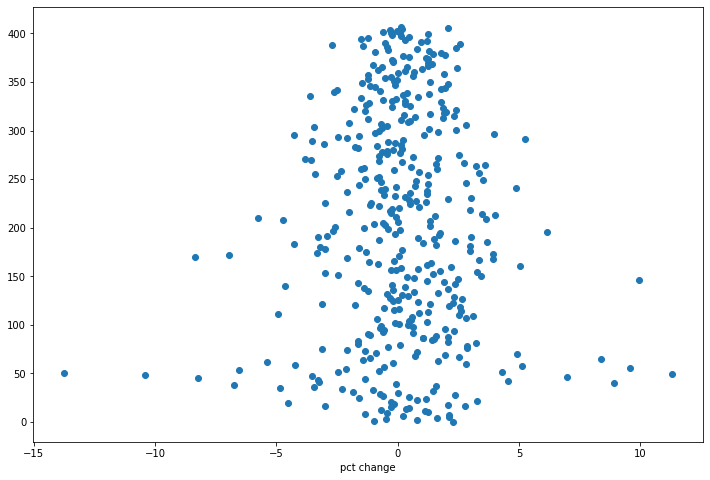

In [39]:
n_sample = np.arange(408)
plt.scatter(aapl_diff,n_sample)
plt.xlabel('pct change')

Text(0.5, 0, 'pct change')

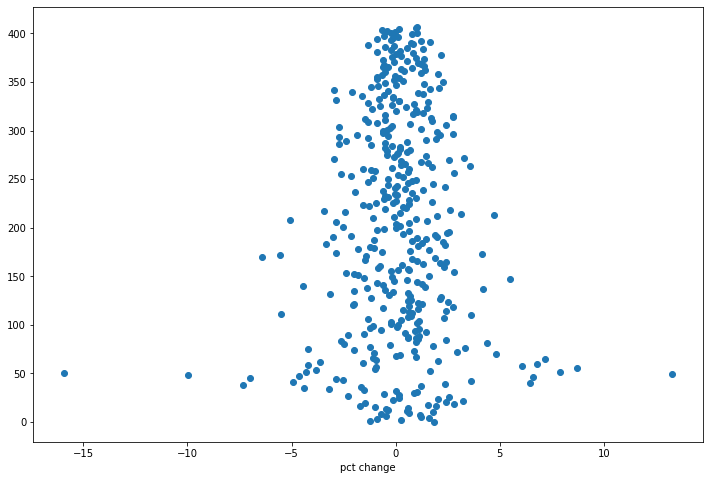

In [40]:
n_sample = np.arange(408)
plt.scatter(msft_diff,n_sample)
plt.xlabel('pct change')

### 데이터셋을 위한 시리즈 합치기

In [7]:
dataset = pd.concat([aapl_diff,msft_diff], axis= 1)

### 회귀분석 요약

In [8]:
res = sm.OLS(aapl_diff, msft_diff).fit()
res.summary()
print(res.summary())
res_table_msft = pd.read_html(res.summary().tables[1].as_html(), header=0, index_col = 0)[0]
msft_coef = res_table_msft['coef'].values[0]

                                 OLS Regression Results                                
Dep. Variable:                   AAPL   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              873.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                   2.58e-103
Time:                        16:12:04   Log-Likelihood:                         -724.13
No. Observations:                 408   AIC:                                      1450.
Df Residuals:                     407   BIC:                                      1454.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 요약표의 Prob(JB)을 확인을 통해 잔차의 정규성을 확인할 수 있다.

### 산포도 (데이터 조사)

Text(0, 0.5, 'microsoft pct')

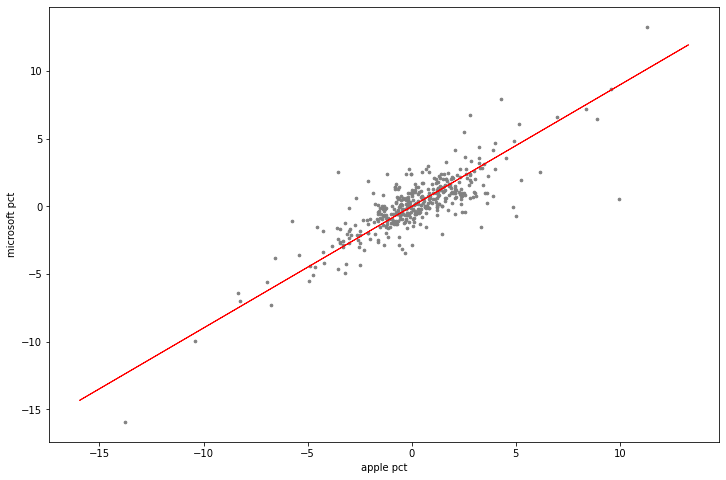

In [12]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = (12,8)
plt.scatter(aapl_diff, msft_diff, s =7, c='gray')
plt.plot(msft_diff, 0.8991*msft_diff, c='red')

plt.xlabel('apple pct')
plt.ylabel('microsoft pct')

In [13]:
from statsmodels.stats.stattools import jarque_bera

### jarque_bera 검정을 통한 정규성 확인

In [28]:
test = jarque_bera(aapl_diff-msft_coef*msft_diff)

print("JB test : %f \nJB p-value : %f \nskew : %f \nkurtosis %f" %(test[0], test[1], test[2], test[3]))


JB test : 620.561568 
JB p-value : 0.000000 
skew : 0.717082 
kurtosis 8.869139


statsmodels jarque_bera 검정은 총 4가지 값을 제공합니다.

1. JB test
2. JB p-value : 잔차가 정규분포를 따른다는 것을 위배할 확률
3. skew : 왜도 (확률 분포가 평균을 중심으로 얼마나 비대칭한가를 나타내는 척도, 정규 분포의 경우 skew = 0)
4. kurtosis : 첨도 (확률 분포가 얼마나 뾰족한지를 나타내는 척도, 정규분표의 경우 kurtosis = 8)

### 잔차 시각화

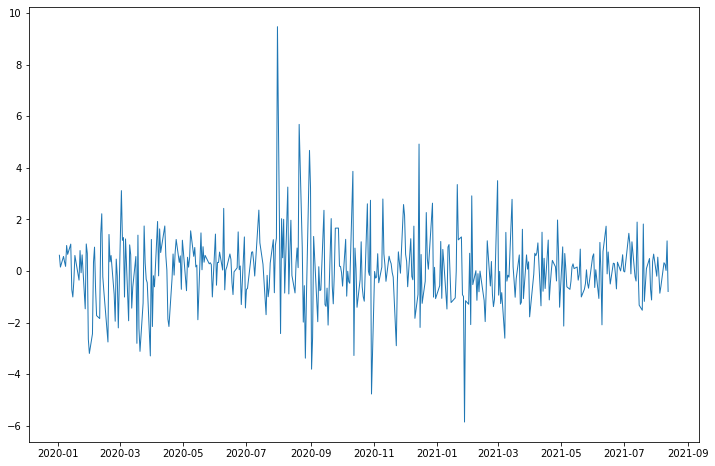

In [16]:
residual_graph = aapl_diff-msft_coef*msft_diff
plt.plot(residual_graph)

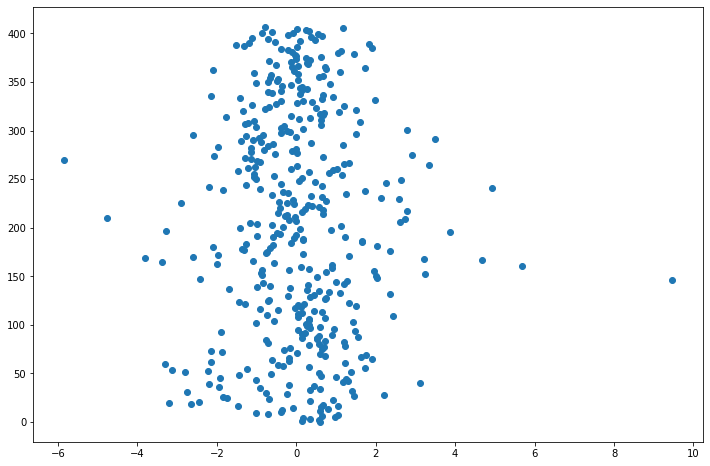

In [41]:
n_sample = np.arange(408)
residual_graph = aapl_diff-msft_coef*msft_diff
plt.scatter(residual_graph, n_sample)
